#### Evaluation/Classification Metrics

#### Confusion Matrix - TP,FN,FP,TN
1) It is a squyare matrix consisting of TP,FN,FP,TN<br>
2) If target variable has n categories, then confusion matris has a shape of (n,n)


Precision,Recall,f1-score,Accuray,suport,macroavg,wt_avg

In [1]:
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
y_true = [0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0]
y_pred = [1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1]
print(len(y_true))
print(len(y_pred))

21
21


#### Terminologies

1) <b>TP (True Positive)</b><br>
Actual value is Positive, ML model also predicted a positive value

2) <b>FN</b><br>
Actual value is Positive, ML model predicted a negative value

3) <b>FP</b><br>
Actual value is negative, ML model predicted a positive value

4) <b>TN</b><br>
Actual value is Negative, ML model also predicted a negative value

Sum of Actual positive values => TP + FN <br>
Sum of Actual negative values => FP + TN<br>
Sum of predicted positive values => TP + FP<br>
Sum of Predicted negative values => FN + TN <br>

In [6]:
# 0- Positive(True), 1- Negative(False)
y_true = [0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1]
y_pred = [1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0]
print(len(y_true))
print(len(y_pred))

22
22


In [8]:
cm = confusion_matrix(y_true,y_pred)
print(cm)
# Actual value = 0, predicted value = 0 => TP = 5
# Actual value = 0, predicted value = 1 => FN = 6
# Actual value = 1, predicted value = 0 => FP = 7
# Actual value = 1, predicted value = 1 => TN = 4
# [TP FN]
# [FP TN]

[[5 6]
 [7 4]]


#### Precision = TP/(TP+FP), TN/(FN + TN)
From the Sum of predicted positive values, how many are actually positive<br>
From the Sum of predicted negative values, how many are actually negative<br>

#### Recall = TP/(TP+FN), TN/(TN +FP)
From the Sum of Actual positive values,how many has the model has predicted as positive<br>
From the Sum of Actual negative values,how many has the model has predicted as negative<br>

#### F1-score - 2*pre*rec/(pre+rec)
Harmonic mean between Pre and Rec<br>

In [10]:
print(classification_report(y_true,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.40      0.36      0.38        11

    accuracy                           0.41        22
   macro avg       0.41      0.41      0.41        22
weighted avg       0.41      0.41      0.41        22

[[5 6]
 [7 4]]


In [11]:
# Precision = TP/(TP+FP), TN/(FN + TN)
# Recall = TP/(TP+FN), TN/(TN +FP)
# Acc= TP+Tn/(TP+FN+FP+TN)
# [TP=5 FN=6]
# [FP=7 TN=4]

In [13]:
pre0 = 5/(5+7)
pre1 = 4/(4+6)
rec0 = 5/(5+6)
rec1 = 4/(4+7)
print('pre0',pre0)
print('pre1',pre1)
print('rec0',rec0)
print('rec1',rec1)

pre0 0.4166666666666667
pre1 0.4
rec0 0.45454545454545453
rec1 0.36363636363636365


In [14]:
acc = (5+4)/(5+6+7+4)
print('acc',acc)

acc 0.4090909090909091


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
x = iris.data
y = iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [20]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
fn = iris.feature_names
print(fn)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
df = pd.DataFrame(x,columns=fn)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
print(y[:5])

[0 0 0 0 0]


In [28]:
from collections import Counter

In [29]:
c1 = Counter(y)
print(c1)

Counter({0: 50, 1: 50, 2: 50})


In [30]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [31]:
df.duplicated().sum()

1

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().sum()

0

In [37]:
df.shape

(149, 4)

In [36]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
m1 = DecisionTreeClassifier(criterion='gini',min_samples_split=15,max_depth=3)
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=15)

In [52]:
# Accuracy
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.9910714285714286
Testing score 0.9210526315789473


In [53]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
def gen_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred))

In [56]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1 1 1 0 0 0 1 1
 0]


In [57]:
gen_metrics(y_test,ypred_m1)

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



In [60]:
from sklearn import tree
from sklearn.tree import export_text

In [62]:
# fn - feature names
# cn - class names 
# fn = x_train.columns
cn = ['0','1','2']
print(fn)
print(cn)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['0', '1', '2']


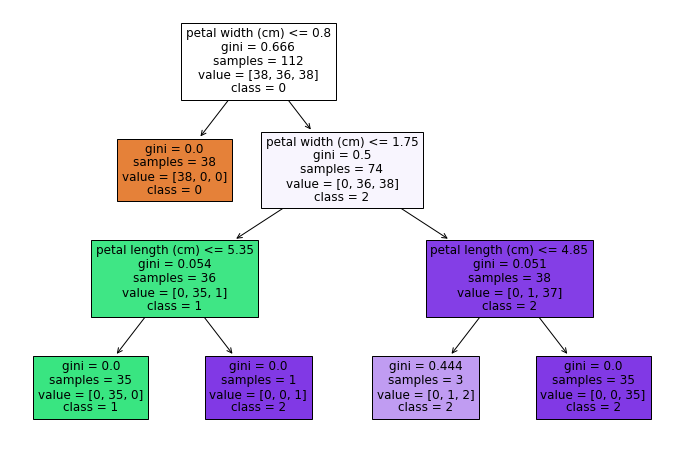

In [63]:
plt.figure(figsize=(12,8))
tree.plot_tree(m1,feature_names=fn,class_names=cn,filled=True)
plt.show()

### DT with Entropy

In [66]:
m2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=25,
                            max_depth=4)
m2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=25)

In [65]:
print('Training score',m2.score(x_train,y_train))
print('Testing score',m2.score(x_test,y_test))

Training score 0.9910714285714286
Testing score 0.9210526315789473


In [67]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1 1 1 0 0 0 1 1
 0]


In [68]:
gen_metrics(y_test,ypred_m2)

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



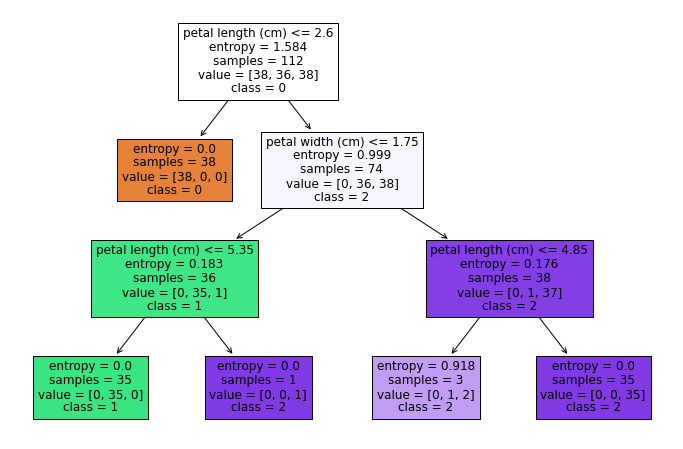

In [69]:
plt.figure(figsize=(12,8))
tree.plot_tree(m2,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [73]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [74]:
m3 = RandomForestClassifier(n_estimators=70,criterion='gini',
                            max_depth=3,min_samples_split=15)

In [75]:
model_metrics(m3,x_train,x_test,y_train,y_test)

Training score 0.9732142857142857
Testing score 0.8947368421052632
Predictions [0 1 1 1 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1 1 1 0 0 0 1 1
 0]
[[12  0  0]
 [ 0 14  0]
 [ 0  4  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      1.00      0.88        14
           2       1.00      0.67      0.80        12

    accuracy                           0.89        38
   macro avg       0.93      0.89      0.89        38
weighted avg       0.92      0.89      0.89        38



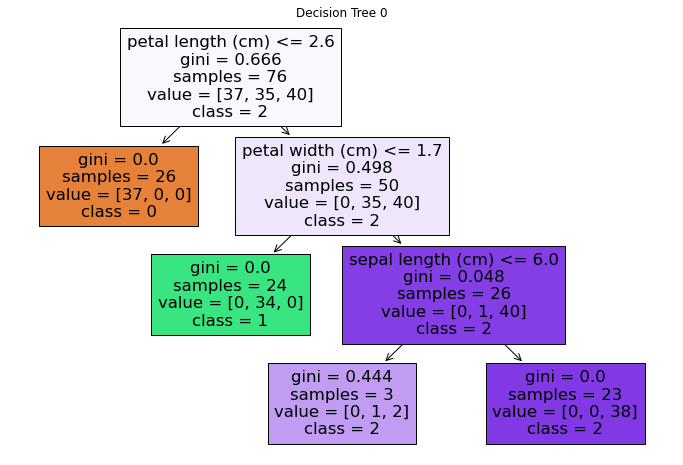

In [77]:
plt.figure(figsize=(12,8))
tree.plot_tree(m3.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.title('Decision Tree 0')
plt.show()

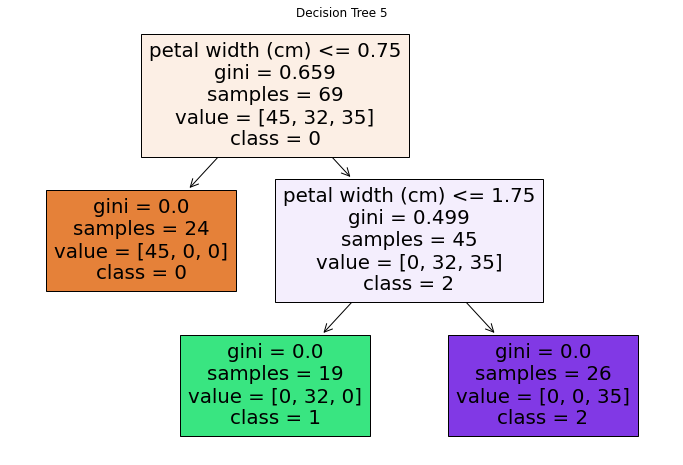

In [78]:
plt.figure(figsize=(12,8))
tree.plot_tree(m3.estimators_[5],feature_names=fn,class_names=cn,filled=True)
plt.title('Decision Tree 5')
plt.show()

### Feature Importances

N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

In [79]:
fimp_m3 = pd.DataFrame({'Features':fn,
                        'Norm_Imp':m3.feature_importances_})
fimp_m3.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
3,petal width (cm),0.503948
2,petal length (cm),0.398816
0,sepal length (cm),0.086903
1,sepal width (cm),0.010333
